<a href="https://colab.research.google.com/github/leonardoub/cmepda/blob/master/Boston_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape


(102, 13)

##Preparing data

Standardization, subtract the mean of the features and divide by the standard deviation

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean


In [0]:
std = train_data.std(axis=0)
train_data /= std

In [0]:
test_data -= mean
test_data /= std

#Building your network

In [0]:
from keras import models
from keras import layers

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [24]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


##Validating using K-fold validation

In [0]:
import numpy as np


In [0]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [12]:
for i in range(k):
  print(f'processing fold # {i}')
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]], axis=0)
  partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples :]], axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)

  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)


processing fold # 0












processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
all_scores

[2.092301326222939, 2.5256927060608816, 2.6825780490837476, 2.356730043297947]

In [14]:
np.mean(all_scores)

2.4143255311663787

500 epochs


In [15]:
num_epochs = 500
all_mae_histories = []
all_mae_val_histories = []
all_loss_histories = []
all_loss_val_histories = []
for i in range(k):
  print(f'processing fold # {i}')
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]], axis=0)
  partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples :]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), 
                      epochs= num_epochs, batch_size=1, verbose=0)
  
  mae_history = history.history['mean_absolute_error']
  all_mae_histories.append(mae_history)

  mae_val_history = history.history['val_mean_absolute_error']
  all_mae_val_histories.append(mae_val_history)

  loss_history = history.history['loss']
  all_loss_histories.append(loss_history)

  loss_val_history = history.history['val_loss']
  all_loss_val_histories.append(loss_val_history)

  


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
len(all_mae_histories)

4

In [0]:
average_mae_val_history = [np.mean([x[i] for x in all_mae_val_histories]) for i in range(num_epochs)]
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_loss_val_history = [np.mean([x[i] for x in all_loss_val_histories]) for i in range(num_epochs)]
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]

In [18]:
len(average_mae_history)

500

#Plotting training and validation mae

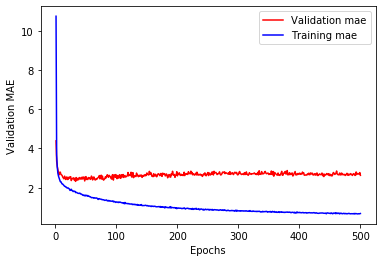

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_val_history) + 1), average_mae_val_history, 'r', label='Validation mae')
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, 'b', label='Training mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()


#Plotting training and validation loss

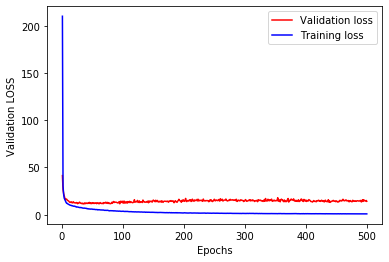

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_loss_val_history) + 1), average_loss_val_history, 'r', label='Validation loss')
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Validation LOSS')
plt.legend()
plt.show()

###Plotting validation scores

```
# This is formatted as code
```



In [0]:
import matplotlib.pyplot as plt


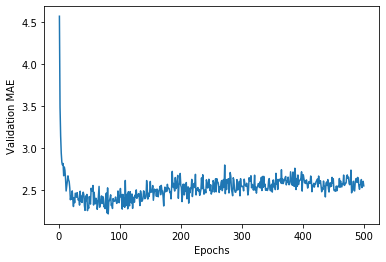

In [0]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

###Plotting validation scores, excluding the first 10 data points 


In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [0]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

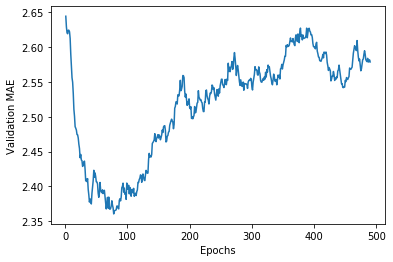

In [0]:
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Overfitting starts near 80 epochs

##Final model

In [0]:
model = build_model()

In [0]:
  model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
  

In [0]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [0]:
test_mae_score

2.7561530318914675